In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Row只顯示15個、Column只顯示10個
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

In [25]:
# 使用scikit-learn提供的鳶尾花資料
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


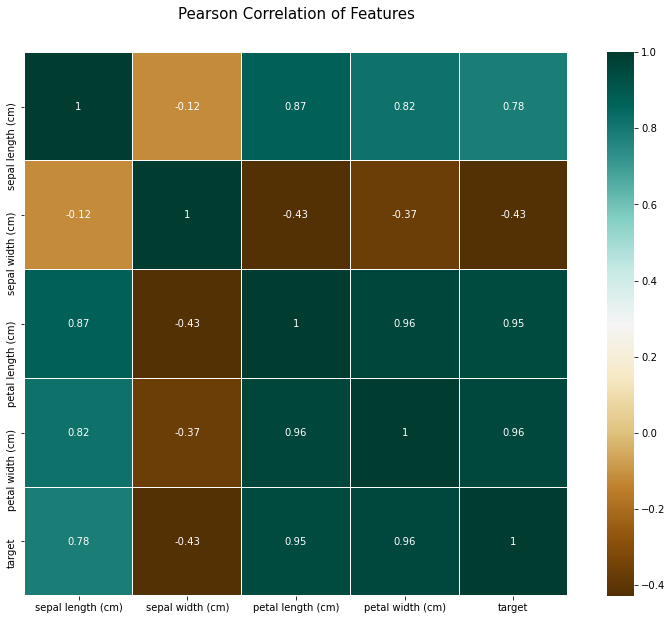

In [12]:
# 熱圖
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), cmap='BrBG',\
           linewidths=0.1, square=True, linecolor='white',\
           annot=True)

In [17]:
# 資料分成兩份，一份訓練，一份測試
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(iris['data'], iris['target'], test_size=0.1)


array([2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1])

In [22]:
# 訓練模型
# 1. 使用DecisionTreeClassifier來訓練
# 2. 使用fit將你要訓練的數據餵進來
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(data_train, target_train)

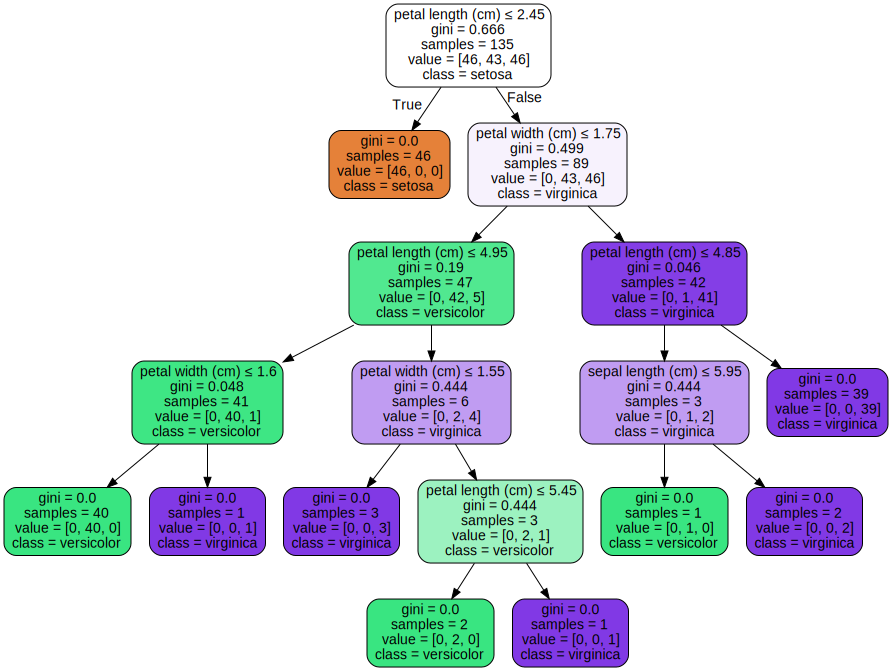

In [27]:
# 畫圖
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None,
                          feature_names=iris.feature_names,
                          class_names=iris.target_names,
                          filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('iris') # 輸出pdf
graph

In [34]:
# 預測，並算出正確機率
from sklearn. metrics import accuracy_score
predict = clf.predict(data_test)
print(f'預測：{predict}')
print(f'正確標籤：{target_test}')
accuracy_score(predict, target_test)
print(f'正確率：{accuracy_score(predict, target_test) *100}%')

預測：[2 1 0 1 2 1 0 1 0 0 1 2 1 2 1]
正確標籤：[2 1 0 1 2 1 0 1 0 0 1 2 1 2 1]
正確率：100.0%


In [36]:
# 使用 混淆矩陣 Confusion Matrix 來確認分類

![混淆矩陣 confusion matrix](https://www.pianshen.com/images/27/c2254a5e7d24054c2e7a9e5a359f534b.png)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predict, target_test)
pd.DataFrame(cm)

,0,1,2
0,4,0,0
1,0,7,0
2,0,0,4


In [38]:
# 對於每個特徵的看重程度 iris.feature_names
# ['sepal length (cm)',  'sepal width (cm)',  'petal length (cm)',  'petal width (cm)']
clf.feature_importances_ # 花瓣petal的重要程度較高

array([0.01482213, 0.        , 0.57558182, 0.40959605])

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']